### Importing Libraries

In [1]:
import tensorflow as tf
print(tf.__version__)

2.7.0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Get the data

In [4]:
# Get the data
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2022-01-31 15:41:43--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv.1’

moore.csv.1         100%[===================>]   2.25K  --.-KB/s    in 0s      

2022-01-31 15:41:43 (35.6 MB/s) - ‘moore.csv.1’ saved [2302/2302]



In [12]:
# Load in the data
data = pd.read_csv('moore.csv', header=None).values
data

array([[       1971,        2300],
       [       1972,        3500],
       [       1973,        2500],
       [       1973,        2500],
       [       1974,        4100],
       [       1974,        4500],
       [       1974,        8000],
       [       1975,        3510],
       [       1976,        5000],
       [       1976,        8500],
       [       1976,        6500],
       [       1978,        9000],
       [       1978,       29000],
       [       1979,       17500],
       [       1979,       29000],
       [       1979,       68000],
       [       1981,       11500],
       [       1982,       55000],
       [       1982,      134000],
       [       1983,       22000],
       [       1984,       63000],
       [       1984,      190000],
       [       1985,      275000],
       [       1985,       25000],
       [       1985,       16000],
       [       1986,      110000],
       [       1986,      375000],
       [       1986,       30000],
       [       1987,

In [13]:
data.shape

(162, 2)

In [19]:
# Make X and y
X = data[:,0].reshape(-1, 1) # make it a 2-D array of size N x D where D = 1
y = data[:, 1]

In [22]:
# X

In [25]:
# y

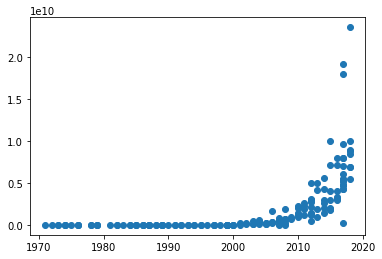

In [26]:
# Plot the data - it is experimental
plt.scatter(X, y)

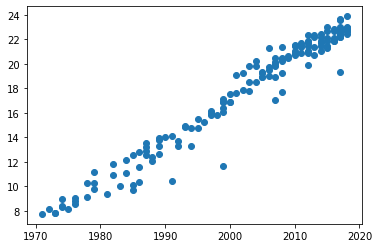

In [27]:
# Since we want a linear model, let's take the log
y = np.log(y)
plt.scatter(X, y)

In [28]:
# Let's also center the X data so the values are not too large
# We could scale it too but then we'd have to reverse the transformation later
X = X - X.mean()

In [29]:
X.shape

(162, 1)

### Create the Model and Train the model

In [30]:
# Now create our TensorFlow model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)                               
])

In [32]:
model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss='mse')

In [39]:
# learning rate scheduler
def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [40]:
# Train the model
r = model.fit(X, y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 0s 2ms/step - loss: 633.6382 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 2ms/step - loss: 334.7033 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 2ms/step - loss: 281.5381 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 2ms/step - loss: 222.4643 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 3ms/step - loss: 224.1677 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 3ms/step - loss: 197.9888 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 3ms/step - loss: 169.3512 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 3ms/step - loss: 90.9909 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 2ms/step - loss: 88.2001 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 3ms/step - loss: 81.3168 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 2ms/step - loss: 

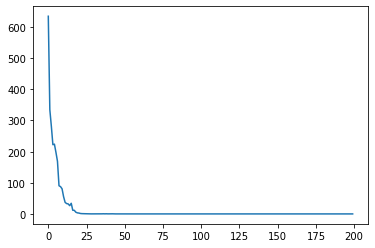

In [41]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')

In [43]:
# Get the slope of the line
# The slope of the line is related to the doubling rate of transistor count
print(model.layers) # Just 1 layer, input layer doesn't count
print(model.layers[0].get_weights())

[array([[0.3437977]], dtype=float32), array([17.768454], dtype=float32)]


In [46]:
# The slope of the line is:
a = model.layers[0].get_weights()[0][0, 0]
a

0.3437977

Our original model for exponential growth is:

$$ C = A_0 r^t $$

Where $ C $ is transistor the count and $ t $ is the year.

$ r $ is the rate of growth. For example, when $ t $ goes from 1 to 2, $ C $ increases by a factor of $ r $. When $ t $ goes from 2 to 3, $ C $ increases by a factor of $ r $ again.

When we take the log of both sides, we get:

$$ \log C = \log r * t + \log A_0 $$

This is our linear equation:

$$ \hat{y} = ax + b $$

Where:

$$ \hat{y} = \log C $$
$$ a = \log r $$
$$ x = t $$
$$ b = \log A_0 $$

We are interested in $ r $, because that's the rate of growth. Given our regression weights, we know that:

$$ a = 0.34188038 $$

so that:

$$ r = e^{0.34188038} = 1.4076 $$

To find the time it takes for transistor count to double, we simply need to find the amount of time it takes for $ C $ to increase to $ 2C $.

Let's call the original starting time $ t $, to correspond with the initial transistor count $ C $.

Let's call the end time $ t' $, to correspond with the final transistor count $ 2C $.

Then we also have:

$$ 2C = A_0 r ^ {t'} $$

Combine this with our original equation:

$$ C = A_0 r^t $$

We get (by dividing the 2 equations):

$$ 2C/C = (A_0 r ^ {t'}) / A_0 r^t $$

Which simplifies to:

$$ 2 = r^{(t' - t)} $$

Solve for $ t' - t $:

$$ t' - t = \frac{\log 2}{\log r} = \frac{\log2}{a}$$


Important note! We haven't specified what the starting time $ t $ actually is, and we don't have to since we just proved that this holds for any $ t $.

In [47]:
print("Time to double", np.log(2) / a)

Time to double 2.016148314271342


In [49]:
# For analytical solutions
X = np.array(X).flatten()
Y = np.array(y)
denominator = X.dot(X) - X.mean() * X.sum()
a = (X.dot(Y) - Y.mean()*X.sum()) / denominator
b = ( Y.mean() * X.dot(X) - X.mean() * X.dot(Y)) / denominator
print(a, b)
print("Time to double:", np.log(2) / a)

0.341682487387313 17.764939393631764
Time to double: 2.0286295205239204


### Making Prediction

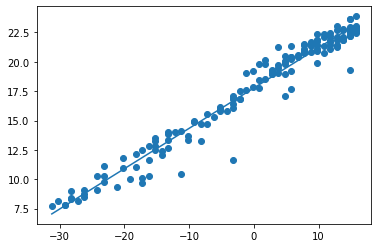

In [51]:
# Make sure the line fit our data
Y_hat = model.predict(X).flatten()
plt.scatter(X, Y)
plt.plot(X, Y_hat)

In [53]:
### Manual Calculation

# Get Weights
w, b = model.layers[0].get_weights()

# Reshape X because we flattened it again earlier
X = X.reshape(-1, 1)

# (N x 1) x (1 x 1) + (1) --> (N x 1)
Y_hat2 = (X.dot(w) + b).flatten()

# Don't use == for floating points
np.allclose(Y_hat, Y_hat2)

True